In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("raw_data_copia.csv", index_col= 0) ## de cara a la exportación para no duplicar el index fantasma

In [3]:
# Comprobar tres colunmas - department, jobrole, roledepartment
# Comparar hourlyrate con el nivel del puesto (joblevel)
df["jobrole"] = df["jobrole"].str.lower()
df["department"] = df["department"].str.lower()
df["roledepartament"] = df["roledepartament"].str.lower()

In [18]:
df[["department", "jobrole", "roledepartament", "joblevel"]].sample(15)

# se puede observar que la columna roledepartament es parecido a una concatenación de las dos primeras columnas.
# Posiblemente un research scientist (por ejemplo) no tenga departamento asignado porque sea un puesto intermedio que dependa de varios departamentos a la vez y por tanto no se le pueda definir ninguno especifico

,department,jobrole,roledepartament,joblevel
366,NaN,sales executive,NaN,3
1065,NaN,laboratory technician,NaN,2
122,sales,sales executive,sales executive - sales,2
1021,NaN,laboratory technician,NaN,1
1075,research & development,research scientist,research scientist - research & development,2
847,NaN,research scientist,NaN,1
272,NaN,laboratory technician,NaN,2
156,NaN,laboratory technician,NaN,1
144,NaN,healthcare representative,NaN,2
606,NaN,sales executive,NaN,2


In [13]:
df["department"].unique()

array([nan, ' research & development ', ' sales ', ' human resources '],
      dtype=object)

In [14]:
df["jobrole"].unique()

array([' research director ', ' manager ', ' sales executive ',
       ' manufacturing director ', ' research scientist ',
       ' healthcare representative ', ' laboratory technician ',
       ' sales representative ', ' human resources '], dtype=object)

In [15]:
df["roledepartament"].unique()

array([nan, ' manager  -  research & development ',
       ' healthcare representative  -  research & development ',
       ' sales executive  -  sales ',
       ' laboratory technician  -  research & development ',
       ' manufacturing director  -  research & development ',
       ' research scientist  -  research & development ',
       ' research director  -  research & development ',
       ' human resources  -  human resources ', ' manager  -  sales ',
       ' sales representative  -  sales ',
       ' manager  -  human resources '], dtype=object)

In [6]:
df["department"].isna().sum()

np.int64(1366)

In [12]:
df.sort_values(by="joblevel")[["jobrole", "joblevel", "education", "educationfield"]]

,jobrole,joblevel,education,educationfield
1659,human resources,1,3,Life Sciences
1658,laboratory technician,1,3,Life Sciences
626,research scientist,1,1,NaN
624,research scientist,1,1,NaN
618,human resources,1,3,Human Resources
...,...,...,...,...
657,research director,5,1,Life Sciences
1664,manager,5,3,Medical
0,research director,5,3,NaN
893,research director,5,2,Medical


In [ ]:
# quiero visualizar  si el hecho de pertenecer a un joblevel concreto tiene correlación con el jobrole, pero como se puede observar no es así.
# Joblevel 1: solo existen en los puestos (human resources, laboratory technician, research scientist, sales representative) pero no en healthcare representative, manager, manufacturing director, research director, sales executive

# Joblevel 2: solo existen en los puestos (healthcare representative, human resources, laboratory technician, manufacturing director, research scientist,  sales executive, sales representative) pero no en manager, research director

# Joblevel 3: solo existen en los puestos (human resources, laboratory technician, research scientist, healthcare representative, manager, manufacturing director, research director, sales executive ) pero no en sales representative

# Joblevel 4: solo existen en los puestos (healthcare representative, manager,  manufacturing director, research director, , sales executive ) pero no en human resources, laboratory technician, research scientist  , sales representative

# Joblevel 5: solo existen en los puestos ( manager, research director) pero no en healthcare representative, human resources, laboratory technician, manufacturing director, research scientist, sales executivesales, sales representative 

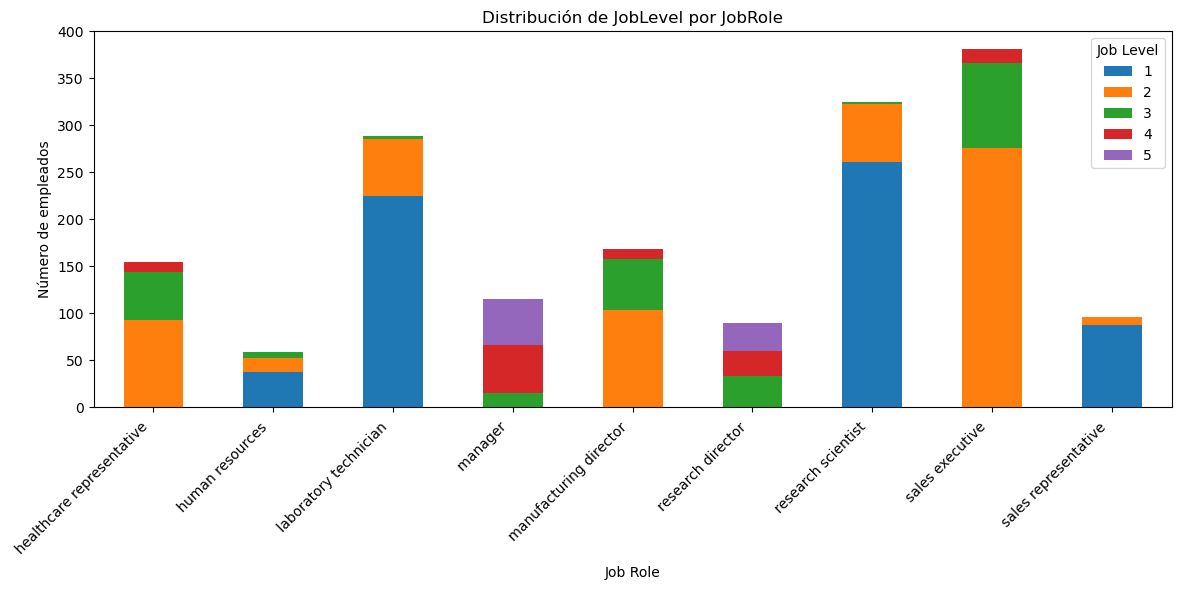

In [ ]:
tabla = df.groupby(["jobrole", "joblevel"]).size().unstack(fill_value=0)

tabla.plot(kind="bar", stacked=True, figsize=(12,6))

plt.title("Distribución de JobLevel por JobRole")
plt.xlabel("Job Role")
plt.ylabel("Número de empleados")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Job Level")
plt.tight_layout()
plt.show()

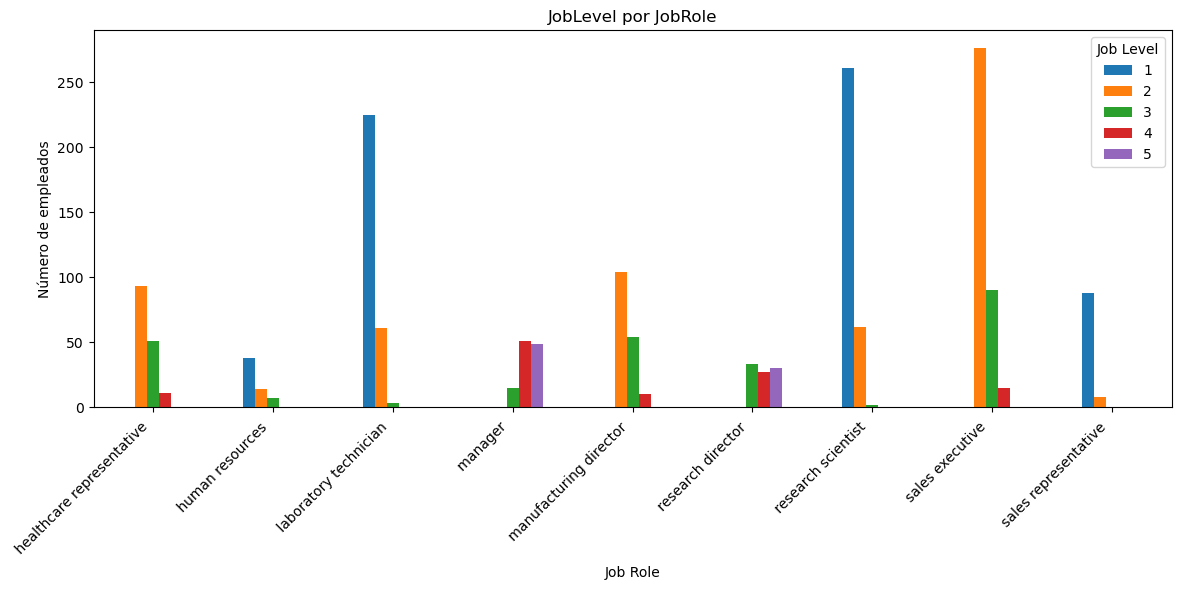

In [17]:
tabla = df.groupby(["jobrole", "joblevel"]).size().unstack(fill_value=0)

tabla.plot(kind="bar", figsize=(12,6))

plt.title("JobLevel por JobRole")
plt.xlabel("Job Role")
plt.ylabel("Número de empleados")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Job Level")
plt.tight_layout()
plt.show()


In [25]:
df[["hourlyrate", "joblevel","jobrole","dailyrate", "monthlyrate", "monthlyincome", "salary"]].sample(20)

,hourlyrate,joblevel,jobrole,dailyrate,monthlyrate,monthlyincome,salary
268,NaN,2,sales executive,704.166667,"14787,50$","5687,50$",NaN
589,NaN,2,sales executive,556.256661,"11681,39$",NaN,"53914,11$"
361,NaN,1,laboratory technician,290.035510,"6090,75$","2342,59$",NaN
1108,NaN,1,research scientist,354.198413,"7438,17$","2860,83$",NaN
61,NaN,2,research scientist,556.256661,"11681,39$",NaN,"53914,11$"
817,NaN,1,laboratory technician,290.035510,"6090,75$",NaN,"28111,13$"
1352,36.254439,1,research scientist,290.035510,"6090,75$","2342,59$","28111,13$"
997,NaN,2,healthcare representative,800.222222,"16804,67$","6463,33$",NaN
418,NaN,2,laboratory technician,556.256661,"11681,39$","4492,84$","53914,11$"
1039,NaN,3,sales executive,1093.238095,"22958,00$","8830,00$",NaN


In [ ]:
dailyrate = ((salary / (dias de trabajo)252 * 2)+30%
monthrate = dailyrate * 21
hourlyrate = dailyrate /8


salary = monthlyincome * 12
monthlyincome = salary / 12

In [24]:
400.936508/8

50.1170635

In [23]:
1025.142857/8

128.142857125

In [22]:
df.groupby("joblevel")["hourlyrate"].agg(
    media="mean",
    mediana="median"
).reset_index()

,joblevel,media,mediana
0,1,36.475285,36.254439
1,2,70.504024,69.532083
2,3,129.000020,129.060911
3,4,197.801428,197.846418
4,5,246.989146,246.748016


In [ ]:
df["hourlyrate"].isnull().sum()

# hay 1.267 nulos en la columna de hourlyrate de un total de 1.678 datos. es muchisimo.

np.int64(1267)

In [24]:
df.shape[0]

1678